# Financial Product Price
Predict financial product price using technical analysis including trend analysis. You are to use time series model such as MA, Holt, Holt Winter, ARIMA, compose decompose to predict Dow's closing (either all the data or partial - cross section).

Things to consider: Residual, Trend, Sesonality and also Stationary (Dicky Fuller Test).

### Import Dataset

In [1]:
import pandas as pd
df = pd.read_csv("/Users/teresazhang/Documents/NTU/Y3S1/BC3409/Assignment/HW5/DJI 1985 to 2019.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000
...,...,...,...,...,...,...,...
8573,2019-02-04,25062.119141,25239.910156,24977.669922,25239.369141,25239.369141,298540000
8574,2019-02-05,25287.929688,25427.320313,25287.650391,25411.519531,25411.519531,310650000
8575,2019-02-06,25371.570313,25439.039063,25312.060547,25390.300781,25390.300781,247590000
8576,2019-02-07,25265.810547,25314.259766,25000.519531,25169.529297,25169.529297,295460000


## Using all the data to predict

In [2]:
df = df.drop(['Date'], axis=1)

In [3]:
df.iloc[:,0]=pd.to_numeric(df.iloc[:,0], errors="coerce")

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
0,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000
...,...,...,...,...,...,...
8573,25062.119141,25239.910156,24977.669922,25239.369141,25239.369141,298540000
8574,25287.929688,25427.320313,25287.650391,25411.519531,25411.519531,310650000
8575,25371.570313,25439.039063,25312.060547,25390.300781,25390.300781,247590000
8576,25265.810547,25314.259766,25000.519531,25169.529297,25169.529297,295460000


### Check for null values

In [5]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
df = df.interpolate()
column_name=df.columns[0]

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8.578000e+03
mean,9386.191224,9443.865701,9326.932124,9388.786163,9388.786163,1.356680e+08
std,5962.912368,5988.153418,5935.948227,5963.358006,5963.358006,1.191448e+08
min,1243.709961,1251.209961,1235.530029,1242.050049,1242.050049,2.530000e+06
25%,3546.774963,3557.847534,3530.810059,3547.507508,3547.507508,2.598000e+07
50%,9824.370117,9902.729981,9756.330078,9824.479981,9824.479981,1.006000e+08
75%,12381.085205,12449.250244,12302.404541,12381.222412,12381.222412,2.227400e+08
max,26833.470703,26951.810547,26789.080078,26828.390625,26828.390625,9.005100e+08


In [8]:
n_row=len(df)
train_row = int(0.8 * n_row)
train = df[0:train_row]
test = df[train_row:]

<AxesSubplot:>

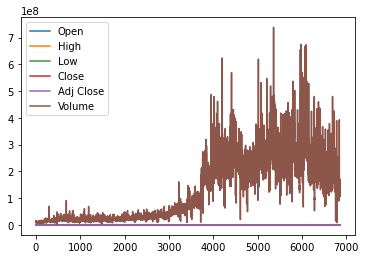

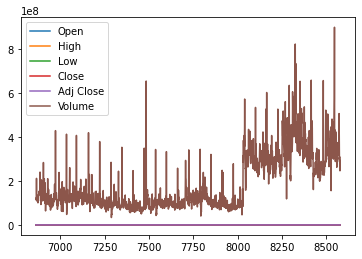

In [9]:
train.plot()
test.plot()

## Using only the Close column to predict

In [10]:
df = df[['Close']]

In [11]:
df.iloc[:,0]=pd.to_numeric(df.iloc[:,0], errors="coerce")

In [12]:
df

,Close
0,1292.619995
1,1287.880005
2,1286.770020
3,1277.719971
4,1290.079956
...,...
8573,25239.369141
8574,25411.519531
8575,25390.300781
8576,25169.529297


### Check for null values

In [13]:
df.isnull().any()

Close    False
dtype: bool

In [14]:
df = df.interpolate()
column_name=df.columns[0]

In [15]:
df.describe()

,Close
count,8578.000000
mean,9388.786163
std,5963.358006
min,1242.050049
25%,3547.507508
50%,9824.479981
75%,12381.222412
max,26828.390625


In [16]:
n_row=len(df)
train_row = int(0.8 * n_row)
train = df[0:train_row]
test = df[train_row:]

<AxesSubplot:>

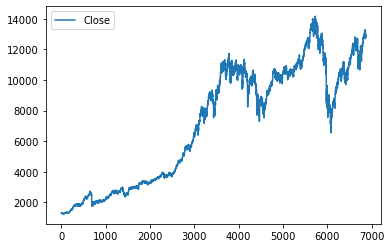

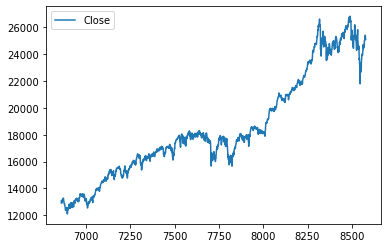

In [17]:
train.plot()
test.plot()

#### Dicky Fuller Test

In [18]:
# Dicky fuller test to check stationary, the number is big, not stationary
from statsmodels.tsa.stattools import adfuller

dicky = adfuller(df)
print(dicky[1])

0.9958475273672025


### Moving Average

In [19]:
from sklearn.metrics import mean_squared_error

pred = test.copy()
pred['MA'] = train.iloc[:,0].rolling(60).mean().iloc[-1]

mean_squared_error(pred['MA'],test[column_name])**0.5

6718.153712824201

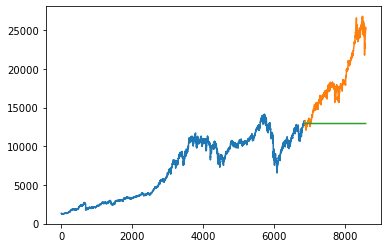

In [20]:
import matplotlib.pyplot as plt 

plt.plot(train)
plt.plot(test)
plt.plot(pred['MA'])
plt.show()

### Exponential Smoothing

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import numpy as np

model = SimpleExpSmoothing(np.asarray(train.iloc[:,0])).fit(smoothing_level=0.6) 
#0.6 is for y(t-1) and 0.4 is for y(t-1 and below)
pred['ES'] = model.forecast(len(test))

mean_squared_error(pred['ES'],test[column_name])**0.5


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


6772.816293987293

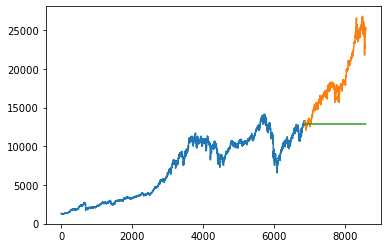

In [22]:
plt.plot(train)
plt.plot(test)
plt.plot(pred['ES'])
plt.show()

### Holt

In [23]:
model = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)  
pred['Holt'] = model.forecast(len(test))
mean_squared_error(pred['Holt'],test[column_name])**0.5

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-23-aca5e5d95117>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


26044.775019443863

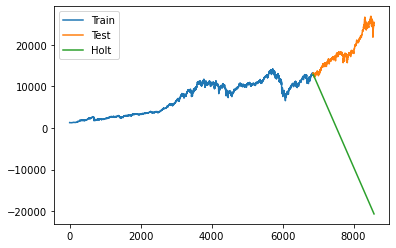

In [24]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['Holt'], label='Holt')
plt.legend(loc='best')
plt.show()
# why is it going down

### Holt Winter

In [25]:
model = ExponentialSmoothing(train, trend='add').fit()

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [26]:
pred['Holt_Winter'] = model.forecast(len(test))

In [27]:
pred

,Close,MA,ES,Holt,Holt_Winter
6862,12921.410156,12943.08055,12876.762992,12865.280287,12854.590577
6863,13115.540039,12943.08055,12876.762992,12845.740321,12853.036806
6864,13032.750000,12943.08055,12876.762992,12826.200356,12851.483034
6865,12964.099609,12943.08055,12876.762992,12806.660391,12849.929263
6866,13029.259766,12943.08055,12876.762992,12787.120426,12848.375492
...,...,...,...,...,...
8573,25239.369141,12943.08055,12876.762992,-20567.599938,10196.088210
8574,25411.519531,12943.08055,12876.762992,-20587.139903,10194.534439
8575,25390.300781,12943.08055,12876.762992,-20606.679868,10192.980668
8576,25169.529297,12943.08055,12876.762992,-20626.219833,10191.426897


In [28]:
pred.isnull().any()

Close          False
MA             False
ES             False
Holt           False
Holt_Winter    False
dtype: bool

In [29]:
mean_squared_error(pred['Holt_Winter'],pred[column_name])**0.5

8307.981904763583

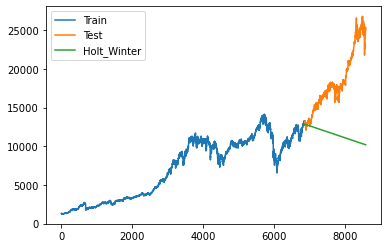

In [30]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
# why is it going down

### SARIMA

In [31]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train.iloc[:,0], order=(1, 1, 1),seasonal_order=(2,2,2,2)).fit()
pred['SARIMA'] = model.forecast(len(test))
mean_squared_error(pred['SARIMA'],pred[column_name])**0.5

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


19835.923641349193

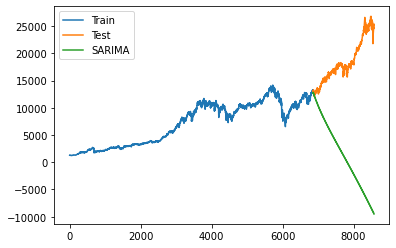

In [32]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()
# why is it going down

### Compose decompose

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train, model='additive', freq=12)
trend = decomposition.trend.dropna()
seasonal=decomposition.seasonal.dropna()
residual=decomposition.resid.dropna()

<ipython-input-33-078d033fc430>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train, model='additive', freq=12)


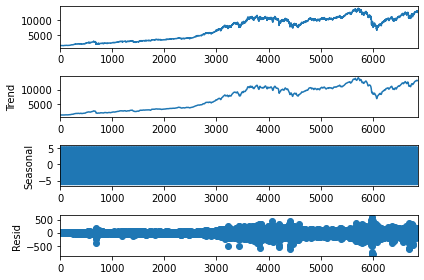

In [34]:
decomposition.plot()
plt.show()
# there is a trend and seasonality

In [35]:
result = adfuller(residual)
print('p-value: %f' % result[1]) 
# residual has a small p-value -> residual is stationary

p-value: 0.000000


In [36]:
#Compose back
#Without Customization (On Test Set) Additive
pred =  trend + seasonal + residual

pred = pred.dropna()[-len(test):]

print(pred)
print(test)
mean_squared_error(pred, test[column_name])**0.5

5140    10547.570313
5141    10566.370117
5142    10578.650391
5143    10623.070313
5144    10609.110352
            ...     
6851    13145.820313
6852    13212.040039
6853    13264.490234
6854    13199.549805
6855    13074.750000
Length: 1716, dtype: float64
             Close
6862  12921.410156
6863  13115.540039
6864  13032.750000
6865  12964.099609
6866  13029.259766
...            ...
8573  25239.369141
8574  25411.519531
8575  25390.300781
8576  25169.529297
8577  25106.330078

[1716 rows x 1 columns]


8198.882177879575

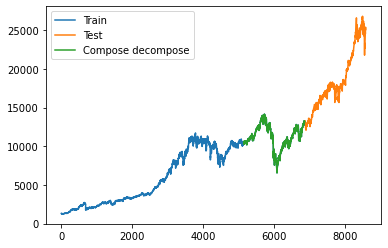

In [37]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Compose decompose')
plt.legend(loc='best')
plt.show()

In [38]:
#Compose back with customization
pred =  1.1*trend + 1.1*seasonal + 1.1*residual
pred = pred.dropna()[-len(test):]
mean_squared_error(pred, test[column_name])**0.5

7245.529627018445

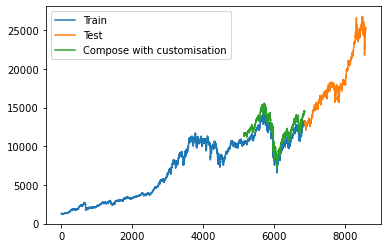

In [39]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Compose with customisation')
plt.legend(loc='best')
plt.show()

### Multiplicative

In [40]:
decomposition = seasonal_decompose(train, model='multiplicative', freq=2)
trend = decomposition.trend.dropna()
seasonal=decomposition.seasonal.dropna()
residual=decomposition.resid.dropna()

#Without Customization (On Test Set) Additive
pred =  1.1*trend*seasonal*residual

pred = pred.dropna()[-len(test):]

mean_squared_error(pred, test[column_name])**0.5


<ipython-input-40-bfe7511ab5ad>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train, model='multiplicative', freq=2)


7237.475938591932

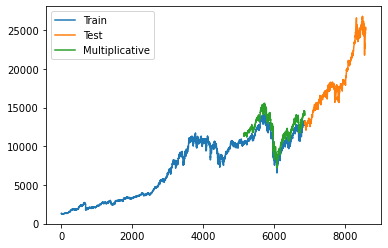

In [41]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Multiplicative')
plt.legend(loc='best')
plt.show()

### Auto Regression

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


intercept    3.778840
Close.L1     0.936082
Close.L2     0.063639
dtype: float64


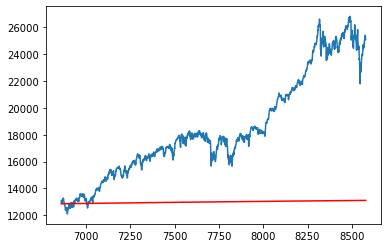

Test RMSE: 6638.878


3000    6460.697776
dtype: float64

In [42]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

# train autoregression
model = AutoReg(train, lags=2)
model = model.fit()
print(model.params)

# make predictions
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

model.predict(3000,3000)

## Conclusion
Strangely, even though the Dicky Fuller Test suggests that the model is not stationary, Moving Average performed the best with the lowest RMSE of 6718.15, while Holt performed the worst with the highest RMSE of 26044.77. Thus, it is hard to prredict financial product price using technical analysis including trend analysis, due to the uncertain graph.